In [140]:
import matplotlib.pyplot as plt
import numpy as np
import mscthesis

In [186]:
xs = np.linspace(1, 500, 500)

In [187]:
def exploration_probability(xs, rho, gamma):
    return rho * (xs ** -gamma)

In [188]:
def exploration_legend_typeset(rho, gamma):
    return r"$\rho = {},    \gamma= {}$".format(rho, gamma)

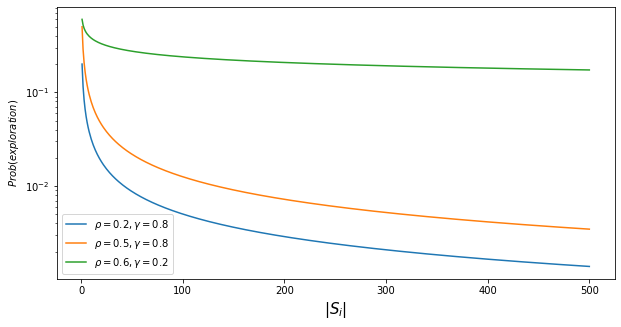

In [315]:
# rho, gamma
parameters = [
    (0.2, 0.8),
    (0.5, 0.8),
    (0.6, 0.2),
]

fig, ax = plt.subplots(1,1, figsize=(10,5))
for (rho, gamma) in parameters:
    ax.plot(xs, exploration_probability(xs, rho, gamma))
    
ax.legend([exploration_legend_typeset(rho, gamma) for (rho, gamma) in parameters])
ax.set_xlabel(r"$\vert S_i \vert$", fontsize=15)
ax.set_ylabel(r"$Prob(exploration)$")
ax.set_yscale('log')

In [321]:
print(exploration_probability(100, 0.6, 0.2))
print(exploration_probability(100, 0.2, 0.8))

0.23886430233209832
0.005023772863019159


# Debiasing

In [144]:
geotweets = mscthesis.read_geotweets_raw("./../../dbs/sweden/geotweets.csv").set_index('userid')

In [147]:
usertweets = geotweets.loc[5616] # Has a lot of tweets so graphs will be pretty

In [172]:
# for zipf
region_counts = usertweets.groupby('region').size().sort_values(ascending=False)
region_probs = region_counts.to_frame(name="count").reset_index()
region_probs = region_probs.assign(
    probability= region_probs['count'] / region_probs['count'].sum()
)

# for distance
distance = np.linspace(1, 1000, 1000)

In [268]:
def zipf(region_range, s):
    probs = np.power(region_range+1, -s)
    probs = probs / np.sum(probs)
    return probs

def distance_preference(xs, beta):
    preference = np.exp(-beta*xs)
    preference = preference / np.sum(preference)
    return preference

Text(0, 1.025, 'B')

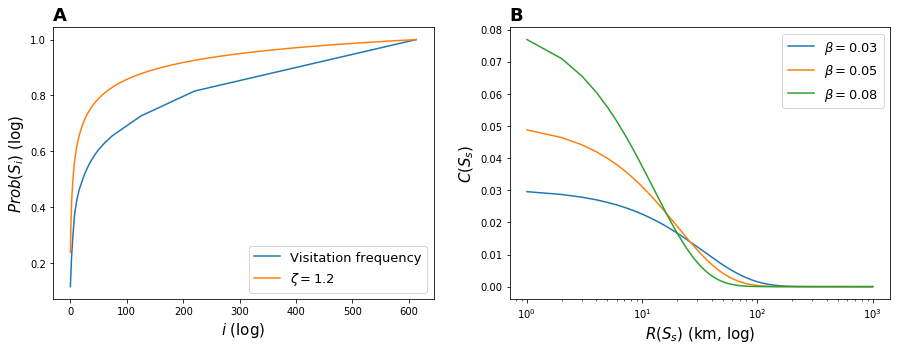

In [301]:
zipfss = [1.2]
betas = [0.03, 0.05, 0.08]

fig, axes = plt.subplots(1,2, figsize=(15,5))

# Zipf 
line, = axes[0].plot(region_probs.index, np.cumsum(region_probs.probability))
line.set_label("Visitation frequency")
for s in zipfss:
    line, = axes[0].plot(
        region_probs.index, # x
        np.cumsum(zipf(region_probs.index, s)), # y
    )
    line.set_label(r"$\zeta = {}$".format(s))

axes[0].set_xlabel(r"$i$ (log)", fontsize=15)
axes[0].set_ylabel(r"$Prob(S_i)$ (log)", fontsize=15)

axes[0].legend(fontsize=13)
axes[0].text(0, 1.025, 'A', transform=axes[0].transAxes, fontsize=18, fontweight='bold')


# Distance
for beta in betas:
    line, = axes[1].plot(distance, distance_preference(distance, beta))
    line.set_label(r"$\beta = {}$".format(beta))

axes[1].set_xscale('log')

axes[1].set_xlabel(r"$R(S_s)$ (km, log)", fontsize=15)
axes[1].set_ylabel(r"$C(S_s)$", fontsize=15)

axes[1].legend(fontsize=13)

axes[1].text(0, 1.025, 'B', transform=axes[1].transAxes, fontsize=18, fontweight='bold')